In [41]:
import imageio
import numpy as np
import os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
photos = ['cameron.jpg',    
          'christie.jpg',     
          'will.jpg', 'brett.jpg',      
          'kaitlin.jpg',    
          'nick.jpg']

In [45]:
photo_list = os.listdir('img')

In [4]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [5]:
def load_photos(n_pixels):
    photo_list = os.listdir('img')
    photo_list = [p for p in photo_list if p != '.DS_Store']
    
    pic = imageio.imread('img/{}'.format(photo_list[0]))
    
    n_samples = len(photo_list)
    g56faces = np.zeros((n_samples, 450*450))

    for i, photo in enumerate(photos):
        pic = imageio.imread('img/{}'.format(photo))
        pic = rgb2gray(pic)
        pic = pic.flatten()
        g56faces[i] = pic

In [7]:
# Global centering
faces_centered = g56faces - g56faces.mean(axis=0)
# Center the columns
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

In [8]:
n_row, n_col = 2, 3
n_components = n_row * n_col

def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    plt.figure(figsize=(2.0 * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

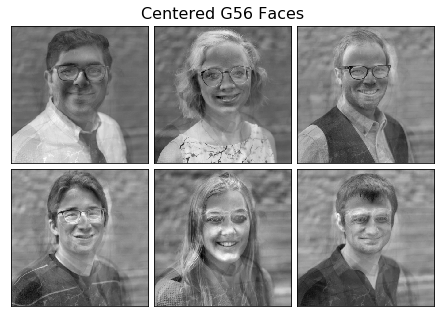

In [9]:
plot_gallery('Centered G56 Faces', faces_centered)

In [10]:
N = 50
faces_pcd = PCA().fit(faces_centered)

In [11]:
faces_centered.shape

(6, 202500)

In [12]:
faces_pcd.components_.shape

(6, 202500)

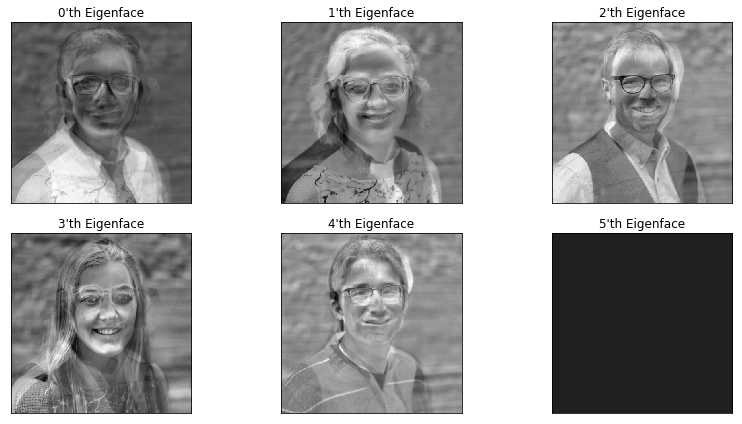

In [226]:
fig, axs = plt.subplots(2, 3, figsize=(12, 6))

for ax, i in zip(axs.flatten(), range(6)):
    eigenface = faces_pcd.components_[i, :].reshape(image_shape)
    ax.imshow(eigenface, cmap=plt.cm.gray)
    ax.set_title("{}'th Eigenface".format(i))
    ax.set_xticks(())
    ax.set_yticks(())
    
fig.tight_layout()

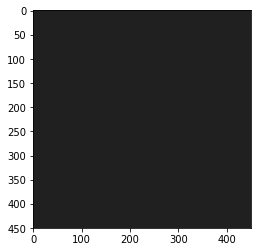

In [208]:
fig, ax = plt.subplots()
ax.imshow(faces_pcd.components_[5,:].reshape(image_shape), cmap=plt.cm.gray)

In [211]:
faces_pcd.components_[5,:].shape

(202500,)

In [33]:
def reduce_face_data(n_dim):
    eigenvalues = faces_pcd.components_[:n_dim, :].T
    faces_reduced = np.dot(np.dot(faces_centered, eigenvalues), eigenvalues.T)
    return faces_reduced

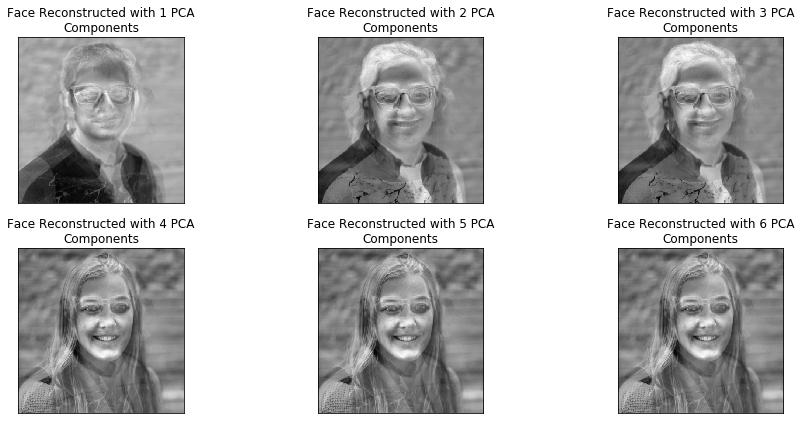

In [40]:
fig, axs = plt.subplots(2, 3, figsize=(13, 6))

for ax, dim in zip(axs.flatten(), [1, 2, 3, 4, 5, 6]):
    reduced_data = reduce_face_data(dim)
    first_face = reduced_data[4].reshape(image_shape)
    ax.imshow(first_face, cmap=plt.cm.gray)
    ax.set_title("Face Reconstructed with {} PCA\nComponents".format(dim))
    ax.set_xticks(())
    ax.set_yticks(())
    
fig.tight_layout()

In [28]:
M = np.dot(faces_centered[:,:10].T, faces_centered[:,:10])

In [30]:
ew, ev = np.linalg.eig(M)

In [31]:
ev.shape

(10, 10)